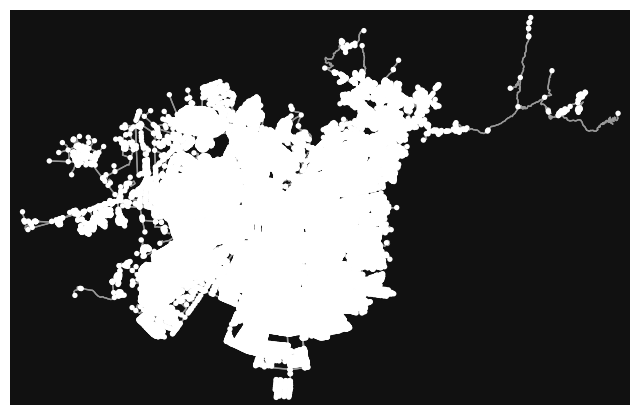

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim
import itertools
import matplotlib

# Configura el lugar de búsqueda, por ejemplo, una ciudad o coordenadas GPS.
place_name = "Provincia de Santiago, Chile"
graph = ox.graph_from_place(place_name, network_type="drive")
ox.plot_graph(graph)

In [3]:
# Crear un objeto geocoder
geolocator = Nominatim(user_agent="Flypack")

# Leer las direcciones
with open("directions.txt", "r", encoding="utf-8") as f:
    direcciones = [line.rstrip('\n') for line in f]

# Encuentra el nodo más cercano a cada dirección intermedia
nodes_in_route = []
recognize = []

for i in direcciones:
    location = geolocator.geocode(i)
    node = ox.distance.nearest_nodes(graph, X=location.longitude, Y=location.latitude)
    nodes_in_route.append(node)
    recognize.append([i, node])
    #print(i, location.longitude, location.latitude, node)

recognize.append(recognize[0])

In [6]:
best_route = [2376521827, 337866925, 2010929719, 1617119309, 2223428335, 2376521827]
nombres = []
nodo_asociado = []
for i in recognize:
    nombres.append(i[0])
    nodo_asociado.append(i[1])

diccionario = dict(zip(nodo_asociado, nombres))
#print(diccionario)

for h in best_route:
    if h in diccionario:
        nombre_asociado = diccionario[h]
        print(f"El nombre asociado al número {h} es: {nombre_asociado}")
    else:
        print(f"No se encontró un nombre asociado al número {h}")

El nombre asociado al número 2376521827 es: Avenida Consistorial 2508, Peñalolén, Provincia de Santiago, Chile
El nombre asociado al número 337866925 es: Nueva Bilbao 9495, Las Condes, Región Metropolitana, Chile
El nombre asociado al número 2010929719 es: Avenida Pedro de Valdivia 2257, Providencia, Provincia de Santiago, Chile
El nombre asociado al número 1617119309 es: Av. José Pedro Alessandri 1166, Ñuñoa, Provincia de Santiago, Chile
El nombre asociado al número 2223428335 es: Paicaví 2721, La Florida, Provincia de Santiago, Chile
El nombre asociado al número 2376521827 es: Avenida Consistorial 2508, Peñalolén, Provincia de Santiago, Chile
